In [1]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210625_skewed_mf_dim_33'

data_script = 'batch_210623_dim_skewed_mfs'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 497
n_grcs = 1847

mf_lim = .33

pattern_type = 'binary'
db = {}

for model in ['observed', 'local_random']:
    for top in [-mf_lim, mf_lim, 1.0]:
        model_name = f'{model}_{top}'
        db[model_name] = compress_pickle.load(
            db_path + \
                f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
                f'zmargin_10000_top_{top}_lim_{mf_lim}_'
                f'0.3_512_40.gz')
    

In [2]:
def get_norm(dbb):
    norm = {}
    sums = defaultdict(list)
    for n_try, ress in enumerate(dbb):
        for noise in ress[0]:
            v = ress[0][noise]['hamming_distance']
            sums[noise].append(v)
    for k, vals in sums.items():
        norm[k] = sum(vals)/len(vals)
    return norm

hamming_norm = {}
hamming_norm['0.33'] = get_norm(db['local_random_0.33'])
hamming_norm['-0.33'] = get_norm(db['local_random_-0.33'])
hamming_norm['1.0'] = get_norm(db['local_random_1.0'])
# print(hamming_norm['0.33'])

{0.05: 17.55078125, 0.1: 33.91015625, 0.15: 50.640625, 0.2: 66.640625, 0.25: 81.890625, 0.3: 97.40625, 0.35: 112.408203125, 0.4: 127.66796875, 0.45: 141.9375, 0.5: 155.896484375, 0.55: 169.76953125, 0.6: 183.81640625, 0.65: 197.92578125, 0.7: 211.330078125, 0.75: 224.185546875, 0.8: 236.8046875, 0.85: 249.17578125, 0.9: 261.708984375, 0.95: 273.234375, 1.0: 286.330078125}


In [9]:
def get_norm(dbb):
    norm = {}
    sums = defaultdict(list)
    for n_try, ress in enumerate(dbb):
        for noise in ress[0]:
            v = ress[0][noise]['grc_dim']
            sums[noise].append(v)
    for k, vals in sums.items():
        norm[k] = sum(vals)/len(vals)
    return norm

grc_avg_dim = {}
grc_avg_dim['0.33'] = get_norm(db['local_random_0.33'])
grc_avg_dim['-0.33'] = get_norm(db['local_random_-0.33'])
grc_avg_dim['1.0'] = get_norm(db['local_random_1.0'])
# print(hamming_norm['0.33'])

Height: 3.7593984962406015, Aspect: 1.33


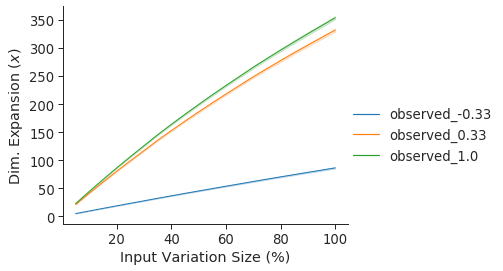

In [27]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
    
        'observed_-0.33',
        'observed_0.33',
        'observed_1.0',
#         'local_random_-0.33',
#         'local_random_0.33',
#         'local_random_1.0',
    
        ]:
    resss = db[model_name]
    if '-0.33' in model_name:
        norm_db = hamming_norm['-0.33']
    elif '_0.33' in model_name:
        norm_db = hamming_norm['0.33']
    else:
        norm_db = hamming_norm['1.0']
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            res = ress[noise]
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                hamming_distance_norm=res['hamming_distance']/norm_db[noise],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
#     y='hamming_distance_norm',
    y='hamming_distance',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Variation Size (%)',
#     title='noise',
#     legend=None,
#     save_filename=f'{script_n}_{noise}.svg',
    show=True,
    )


Height: 3, Aspect: 1.3333333333333333


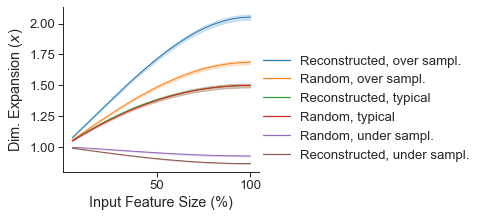

In [5]:

name_map = {
        'observed_0.33': "Reconstructed, over sampl.",
        'observed_1.0': "Reconstructed, typical",
        'local_random_0.33': "Random, over sampl.",
        'local_random_1.0': "Random, typical",
        'local_random_-0.33': "Random, under sampl.",
        'observed_-0.33': "Reconstructed, under sampl.",
}

# palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
# }

mpd = MyPlotData()
for model_name in [
        'observed_0.33',
        'local_random_0.33',
        'observed_1.0',
        'local_random_1.0',
    
        'local_random_-0.33',
        'observed_-0.33',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            res = ress[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
    linewidth=1,
    height=3,
    width=4,
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Feature Size (%)',
    save_filename=f'{script_n}_fig_all.svg',
    show=True,
    )


Height: 3, Aspect: 1.3333333333333333


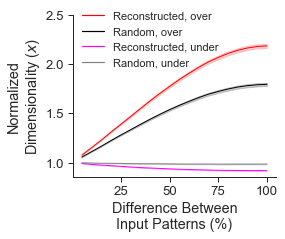

In [29]:

name_map = {
        'observed_0.33': "Reconstructed, over",
#         'observed_1.0': "Reconstructed, typical",
        'local_random_0.33': "Random, over",
#         'local_random_1.0': "Random, typical",
        'local_random_-0.33': "Random, under",
        'observed_-0.33': "Reconstructed, under",
}

palette = {
    name_map['observed_0.33']: 'red',
    name_map['local_random_0.33']: 'black',
    name_map['local_random_-0.33']: 'grey',
    name_map['observed_-0.33']: 'magenta',
}

def custom_legend_fn(plt):
    plt.legend(bbox_to_anchor=(
#         1.025, .8,
        0.025, 1.05,
    ), loc='upper left', borderaxespad=0., frameon=False, fontsize=11)
#     plt.legend(loc='upper left', frameon=False, fontsize=12)

    
mpd = MyPlotData()
for model_name in [
        'observed_0.33',
        'local_random_0.33',
#         'observed_1.0',
#         'local_random_1.0',
        'observed_-0.33',
        'local_random_-0.33',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            res = ress[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
                grc_dim_norm2=res['grc_dim']/grc_avg_dim['-0.33'][noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm2',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    height=3,
    width=4,
    ylim=[None, 2.5],
    y_axis_label='Normalized\nDimensionality ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
    save_filename=f'{script_n}_fig_no_typical.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


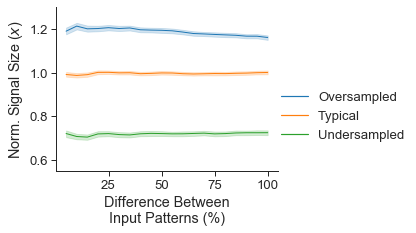

In [6]:

name_map = {
        'observed_0.33': "Oversampled",
        'observed_1.0': "Typical",
        'local_random_0.33': "Random, over sampl.",
        'local_random_1.0': "Random, typical",
        'local_random_-0.33': "Random, under sampl.",
        'observed_-0.33': "Undersampled",
}

# palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
# #     name_map['naive_random_21']: sns.color_palette()[2],
# }

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
    
        'observed_0.33',
        'observed_1.0',
        'observed_-0.33',
#         'local_random_-0.33',
#         'local_random_0.33',
#         'local_random_1.0',
    
        ]:
    resss = db[model_name]
    if '-0.33' in model_name:
        norm_db = hamming_norm['-0.33']
    elif '_0.33' in model_name:
        norm_db = hamming_norm['0.33']
    else:
        norm_db = hamming_norm['1.0']
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            res = ress[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                hamming_distance_norm=res['hamming_distance']/norm_db[noise],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='hamming_distance_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    height=3,
    width=4,
    ylim=[0.55, 1.3],
    y_axis_label='Norm. Signal Size ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_fig_hamming_distance.svg',
    show=True,
    )


Height: 3, Aspect: 1.3333333333333333


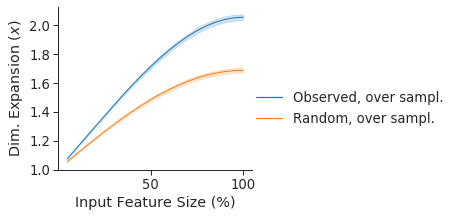

In [14]:

name_map = {
        'observed_0.33': "Observed, over sampl.",
        'observed_1.0': "Observed, typical",
        'local_random_0.33': "Random, over sampl.",
        'local_random_1.0': "Random, typical",
        'local_random_-0.33': "Random, under sampl.",
        'observed_-0.33': "Observed, under sampl.",
}

# palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
# }

mpd = MyPlotData()
for model_name in [
        'observed_0.33',
        'local_random_0.33',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            res = ress[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
    linewidth=1,
    height=3,
    width=4,
    ylim=[1, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Feature Size (%)',
    save_filename=f'{script_n}_fig_less.svg',
    show=True,
    )


Height: 3, Aspect: 1.3333333333333333


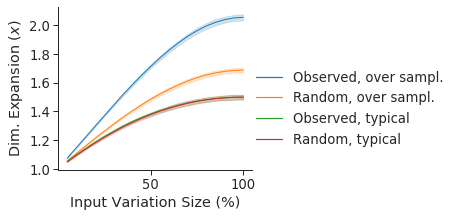

In [12]:

name_map = {
        'observed_0.33': "Observed, over sampl.",
        'observed_1.0': "Observed, typical",
        'local_random_0.33': "Random, over sampl.",
        'local_random_1.0': "Random, typical",
}

# palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
# #     name_map['naive_random_21']: sns.color_palette()[2],
# }

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
#         'observed_-0.33',
        'observed_0.33',
        'local_random_0.33',
        'observed_1.0',
#         'local_random_-0.33',
        'local_random_1.0',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=4,
    height=3,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Variation Size (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_fig.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


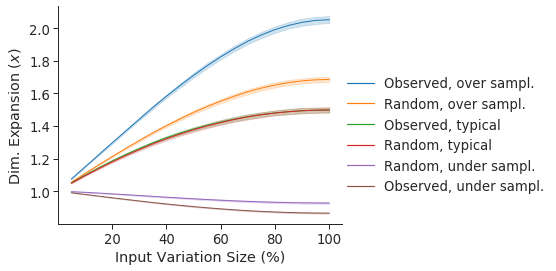

In [8]:

name_map = {
        'observed_-0.33': "Observed, under sampl.",
        'observed_0.33': "Observed, over sampl.",
        'observed_1.0': "Observed, typical",
        'local_random_-0.33': "Random, under sampl.",
        'local_random_0.33': "Random, over sampl.",
        'local_random_1.0': "Random, typical",
}

# palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
# #     name_map['naive_random_21']: sns.color_palette()[2],
# }

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'observed_0.33',
        'local_random_0.33',
        'observed_1.0',
        'local_random_1.0',
        'local_random_-0.33',
        'observed_-0.33',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Variation Size (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_{noise}_1516.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


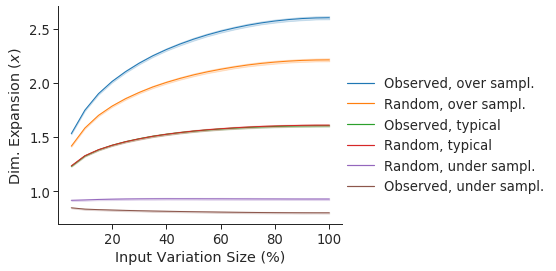

In [17]:

name_map = {
        'observed_-0.33': "Observed, under sampl.",
        'observed_0.33': "Observed, over sampl.",
        'observed_1.0': "Observed, typical",
        'local_random_-0.33': "Random, under sampl.",
        'local_random_0.33': "Random, over sampl.",
        'local_random_1.0': "Random, typical",
}

# palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
# #     name_map['naive_random_21']: sns.color_palette()[2],
# }

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'observed_0.33',
        'local_random_0.33',
        'observed_1.0',
        'local_random_1.0',
        'local_random_-0.33',
        'observed_-0.33',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                grc_pop_corr_inv=1/res['grc_pop_corr'],
                grc_pop_corr_inv_mf=1/res['grc_pop_corr']/(1/res['mf_pop_corr']),
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr_inv_mf',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Variation Size (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_{noise}.svg',
    show=True,
    )
